# Introduction to neural network classification with TensorFlow

Learning how to write neural networks for classification problems

Classification is identifying something as one thing or another.

Some types of classification problems:
* Binary Classificatoin
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [89]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [90]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [91]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualize the data

In [92]:
import polars as pl
circles = pl.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label": y})
circles

X0,X1,label
f64,f64,i64
0.754246,0.231481,1
-0.756159,0.153259,1
-0.815392,0.173282,1
-0.393731,0.692883,1
0.442208,-0.896723,0
-0.479646,0.676435,1
-0.013648,0.803349,1
0.771513,0.14776,1
-0.169322,-0.793456,1


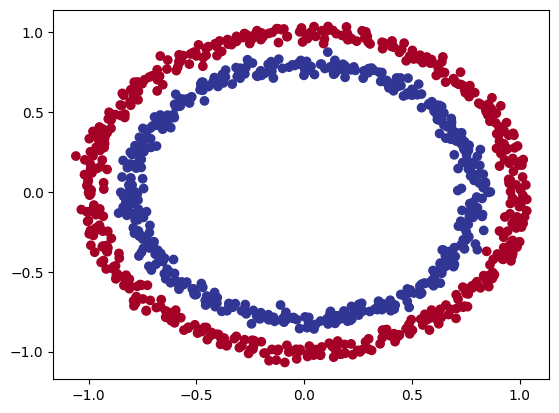

In [93]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [94]:
# Check the shapes of features and lables
X.shape, y.shape

((1000, 2), (1000,))

In [95]:
# How many samples
len(X), len(y)

(1000, 1000)

In [96]:
# View first sample of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate...

In [97]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [98]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5


/home/unix/miniconda3/envs/tf/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 1s 5ms/step - loss: 5.9605e-08 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 5.9605e-08 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 5.9605e-08 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 5.9605e-08 - accuracy: 0.4880
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 5.9605e-08 - accuracy: 0.4880


In [99]:
# Improve model by training longer
model_1.fit(X, y, epochs=50, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 5.9605e-08 - accuracy: 0.4880


[5.960465188081798e-08, 0.4880000054836273]

In [100]:
# Add an extra layer to new model

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1), 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 6ms/step - loss: 1.5464 - accuracy: 0.4880
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.7371 - accuracy: 0.4980
Epoch 3/50
32/32 [==============================] - 0s 8ms/step - loss: 0.7188 - accuracy: 0.4920
Epoch 4/50
32/32 [==============================] - 0s 7ms/step - loss: 0.7082 - accuracy: 0.4950
Epoch 5/50
32/32 [==============================] - 0s 7ms/step - loss: 0.7026 - accuracy: 0.4990
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6991 - accuracy: 0.5030
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6982 - accuracy: 0.5040
Epoch 8/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6965 - accuracy: 0.4960
Epoch 9/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6955 - accuracy: 0.4980
Epoch 10/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.4950
Epoch 11/50
32/32 [

In [101]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5000


[0.693781852722168, 0.5]

## Improving model

1. Create a model - add more layers, increase number of hidden units in a layer, change or add activation layer
2. Compiling a model - Choose a different optimization function such as Adam instead of SGD
3. Fitting a model - fit model with more epochs (training for longer)

In [102]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API (with 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Add 100 dense neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 neurons
    tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [103]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.5050


[0.6986218094825745, 0.5049999952316284]

In [104]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.48284277],
       [0.5636204 ],
       [0.56806654],
       [0.57307285],
       [0.4379659 ],
       [0.5770034 ],
       [0.5577716 ],
       [0.47723478],
       [0.47814146],
       [0.5759258 ],
       [0.51860833],
       [0.5272074 ],
       [0.5651898 ],
       [0.45271802],
       [0.44615418],
       [0.45954505],
       [0.54631   ],
       [0.46258786],
       [0.55304563],
       [0.50744337],
       [0.50212276],
       [0.59147733],
       [0.45857033],
       [0.4862543 ],
       [0.58906454],
       [0.57636684],
       [0.55061764],
       [0.45747948],
       [0.4555648 ],
       [0.44970605],
       [0.48021692],
       [0.580123  ],
       [0.5554336 ],
       [0.45658797],
       [0.45845807],
       [0.5950089 ],
       [0.5761364 ],
       [0.5268241 ],
       [0.45648125],
       [0.50604206],
       [0.5033245 ],
       [0.54402626],
       [0.515171  ],
       [0.45219836],
       [0.5273237 ],
       [0.5444593 ],
       [0.4450413 ],
       [0.542

To visualize the model's predicitons. Create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the prediction as well as a line between zones (where each unique class falls)

In [105]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # Reshape predictions for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else: 
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu) 
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())       

313/313 [==============================] - 0s 1ms/step
doing binary classification


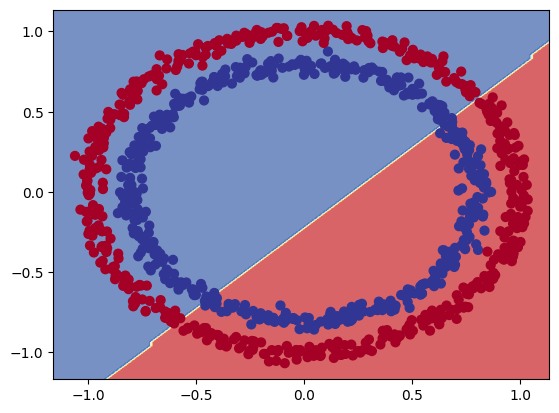

In [106]:
# Plot the decision boundary
plot_decision_boundary(model=model_3, X=X, y=y)

## Non-linearity

In [107]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear") 
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.2949 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2128 - accuracy: 0.4940
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1015 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9999 - accuracy: 0.4420
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8325 - accuracy: 0.4300
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.6913 - accuracy: 0.4220
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 3.5612 - accuracy: 0.4130
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.4320 - accuracy: 0.4210
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 3.1416 - accuracy: 0.4250
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 2.8075 - accuracy: 0.4290
Epoch 11/

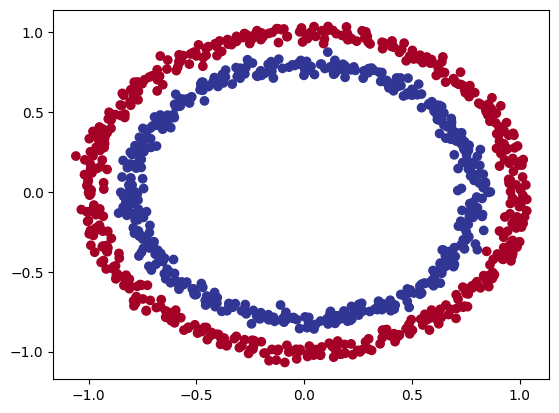

In [108]:
# Check out data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classification


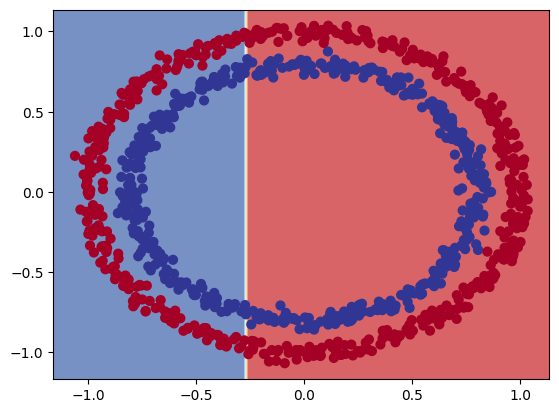

In [109]:
# Check the decision boundary for latest model
plot_decision_boundary(model_4, X, y)

Build neural network with a non-linear activation function

In [110]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu") 
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 6.0675 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 6.0314 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 6.0052 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 5.9911 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 5.9875 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 5.9546 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 5.9382 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 5.9151 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8983 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8846 - accuracy: 0.4830
Epoch 11/

In [111]:
# Create another model with more layers

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"), 
    tf.keras.layers.Dense(1), 
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 5ms/step - loss: 5.6836 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 5ms/step - loss: 4.3869 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 2.3241 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 5ms/step - loss: 1.2508 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 5ms/step - loss: 1.1752 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 5ms/step - loss: 1.1249 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 5ms/step - loss: 1.0841 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0498 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0208 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 0.9956 - accuracy: 0.4790
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classification


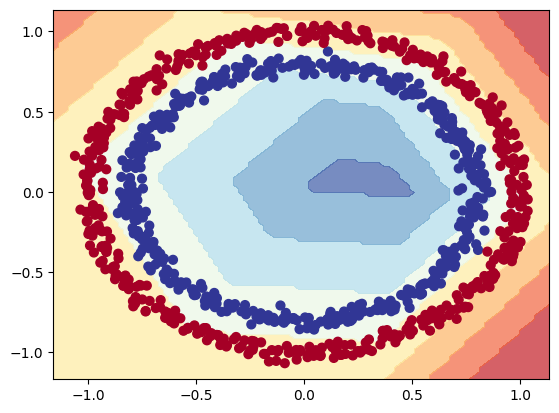

In [112]:
# Plot decision boundary
plot_decision_boundary(model_6, X, y)

In [113]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"), 
    tf.keras.layers.Dense(1, activation="sigmoid"), 
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.7144 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7080 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7039 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7012 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6993 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6977 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6959 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6940 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.4920
Epoch 11/

In [114]:
# 4. Evaluate model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6500


[0.6284584403038025, 0.6499999761581421]

313/313 [==============================] - 0s 1ms/step
doing binary classification


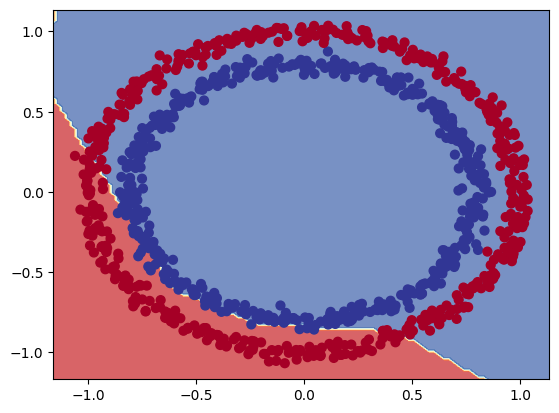

In [115]:
plot_decision_boundary(model_7, X, y)

The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

In [116]:
# Create a toy tensor 
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

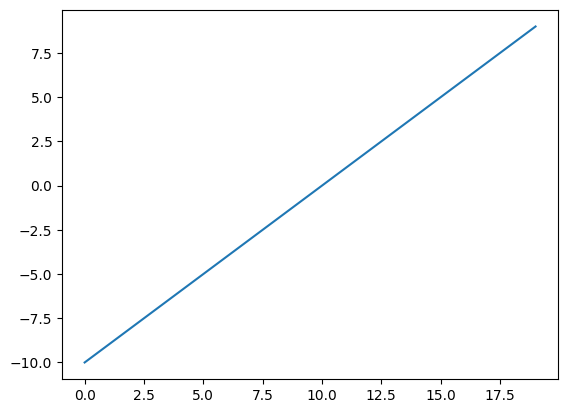

In [117]:
# Visualize toy tensor
plt.plot(A)

In [118]:
# Replicate sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use sigmoid function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

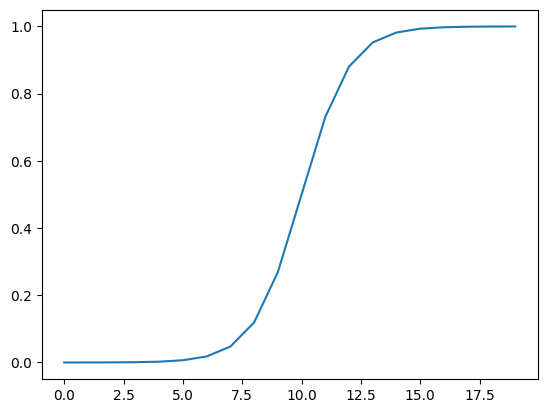

In [119]:
# Plot tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [120]:
# Recreate relu function
def relu(x):
    return tf.maximum(0, x)

# Pass toy tensor to relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

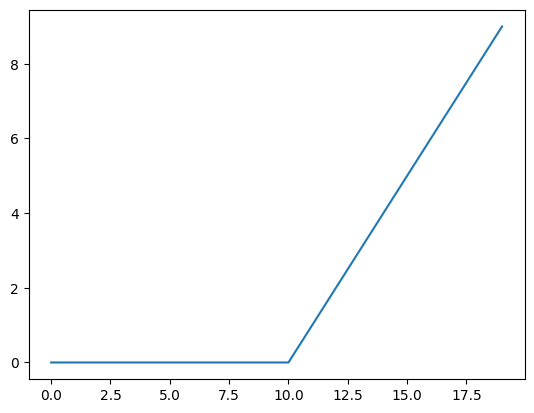

In [121]:
# Plot tensor transformed by ReLU
plt.plot(relu(A))

In [122]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

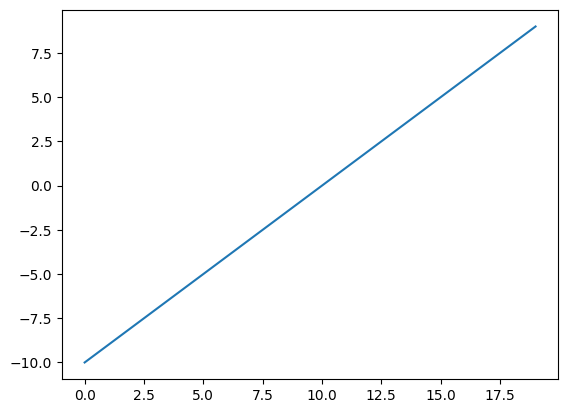

In [123]:
plt.plot(tf.keras.activations.linear(A))

## Evaluating and improving classification model

Create a training and test set.

In [124]:
# Check how many samples
len(X), len(y)

(1000, 1000)

In [125]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [126]:
# Create model that fits on the training data and evaluated using the testing data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model (increase learning rate)
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model (lower number of epochs)
history = model_8.fit(X_train, y_train, epochs=25)


Epoch 1/25
25/25 [==============================] - 1s 5ms/step - loss: 0.6971 - accuracy: 0.5013
Epoch 2/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5038
Epoch 3/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.5638
Epoch 4/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6777 - accuracy: 0.5838
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6699 - accuracy: 0.5600
Epoch 6/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6433 - accuracy: 0.6825
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.7738
Epoch 8/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5601 - accuracy: 0.7900
Epoch 9/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5078 - accuracy: 0.8213
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.4896 - accuracy: 0.7875
Epoch 11/25
25/25 [

In [127]:
# 4. Evaluate the model (must be using test data)
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1456 - accuracy: 0.9600


[0.1455714851617813, 0.9599999785423279]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


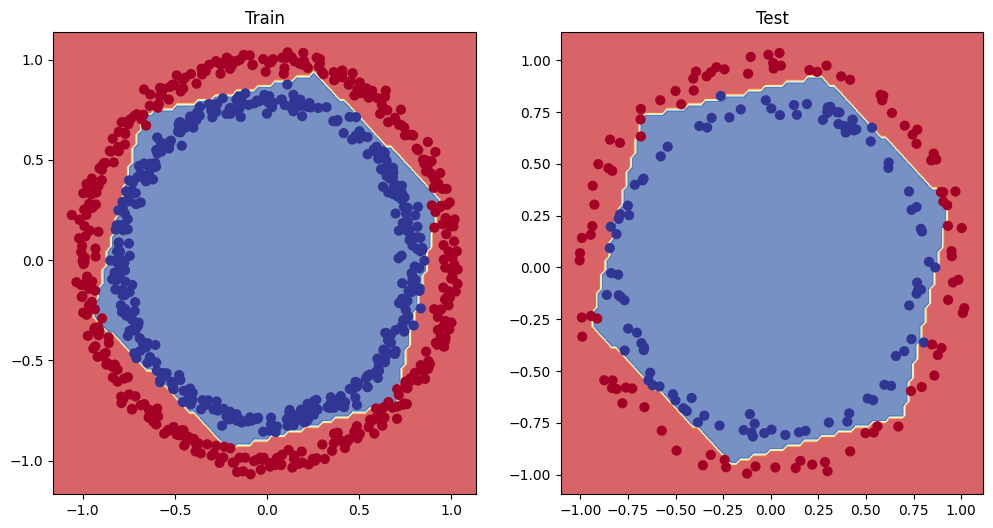

In [128]:
# Plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curvers

In [129]:
# Convert history object to a dataframe
pl.DataFrame(history.history)

loss,accuracy
f64,f64
0.697114,0.50125
0.688674,0.50375
0.683347,0.56375
0.677651,0.58375
0.669866,0.56
0.643319,0.6825
0.604109,0.77375
0.560053,0.79
0.507826,0.82125


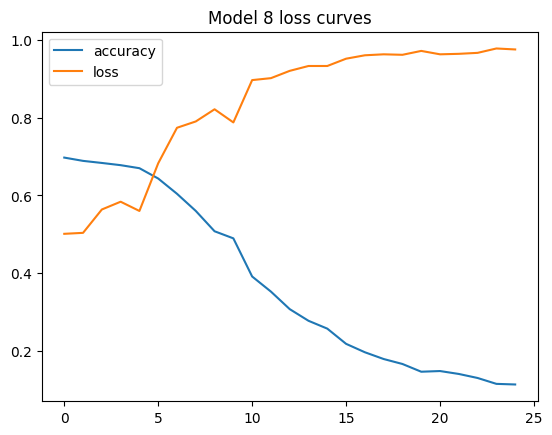

In [130]:
# Plot the loss curves
plt.plot(pl.DataFrame(history.history))
plt.legend(["accuracy","loss"])
plt.title("Model 8 loss curves");

For many problems, the loss function going down means the model is improving (the predictions it's making are getting close to the ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreatese the most during training) use the following steps:

* A learning rate **callback** - extra piece of functionality that can be added while training model
* Another model 
* Modified loss curves plot

In [131]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit the model (pass lr_scheduler)
history_9 = model_9.fit(X_train, 
                      y_train, 
                      epochs=100, 
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7228 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7200 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7171 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7143 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7112 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

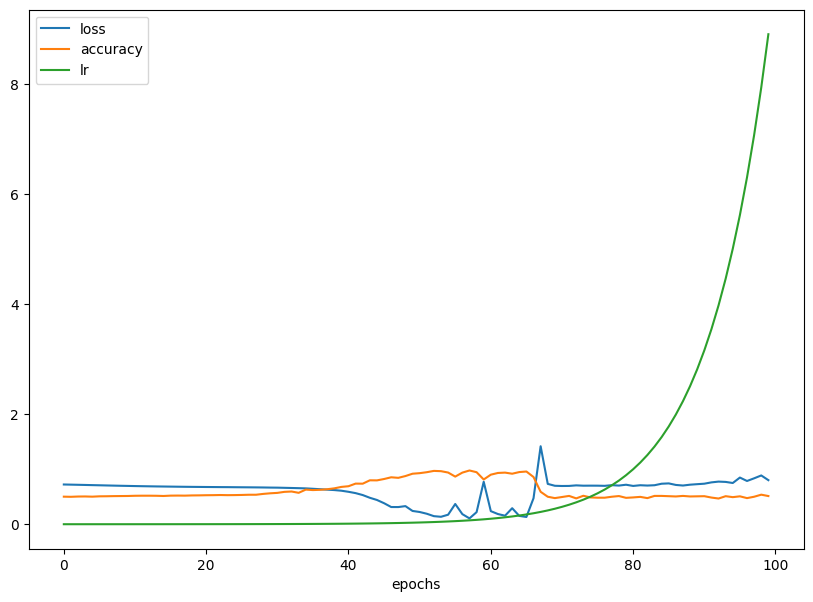

In [132]:
# Checkout history
plt.figure(figsize=(10, 7))
plt.plot(pl.DataFrame(history_9.history))
plt.legend(["loss", "accuracy", "lr"])
plt.xlabel("epochs");

Text(0.5, 1.0, 'Learning rate vs. Loss')

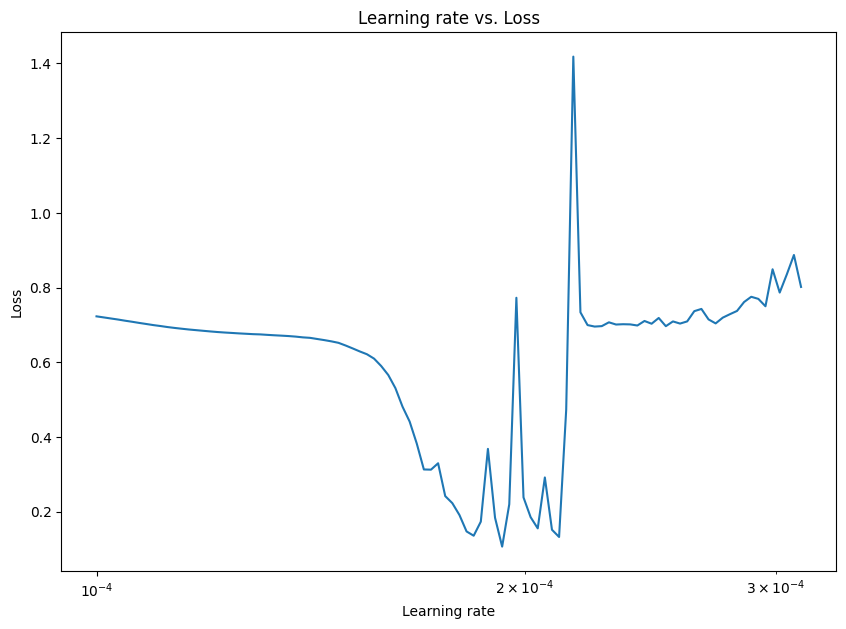

In [133]:
# Checkout the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/200))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [134]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [137]:
# Try using a higher ideal learing rate with the same model

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# 3. Fit the model (pass lr_scheduler)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.7028 - accuracy: 0.4712
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5412
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.5938
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6330 - accuracy: 0.6600
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5771 - accuracy: 0.7050
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4939 - accuracy: 0.8537
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.9663
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2466 - accuracy: 0.9837
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1783 - accuracy: 0.9900
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1378 - accuracy: 0.9925
Epoch 11/20
25/25 [

In [138]:
# 4. Evaluate model 10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0674 - accuracy: 0.9850


[0.06736557185649872, 0.9850000143051147]

In [139]:
# Evaluate model 8 
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9600


[0.1455714851617813, 0.9599999785423279]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


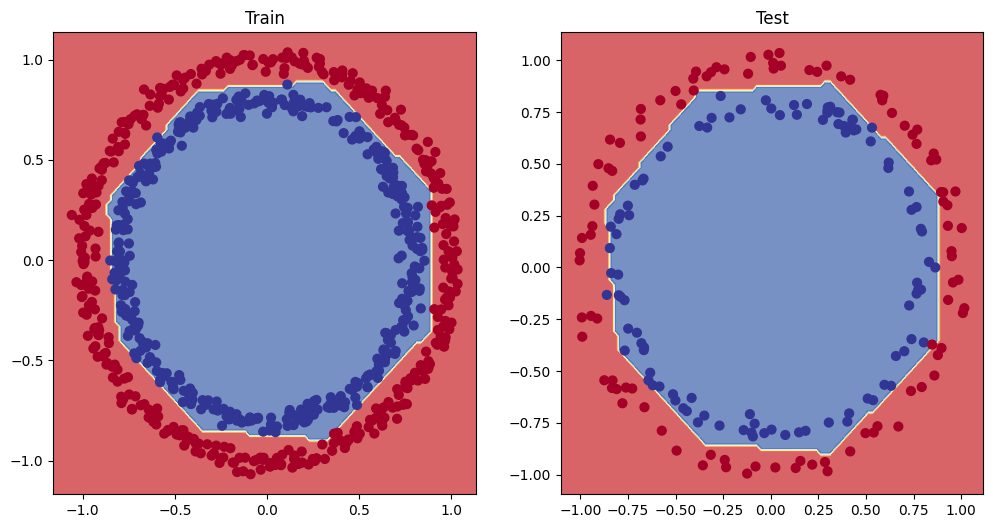

In [140]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

## More classification evaluation methods

* Accuracy
* Precision 
* Recall
* F1-score 
* Confusion Matrix
* Classification Report (Scikit-learn)

In [141]:
# Check model accuracy
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss: {loss}")
print(f"Model accuracy: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0674 - accuracy: 0.9850
Model loss: 0.06736557185649872
Model accuracy: 98.50%


7/7 [==============================] - 0s 3ms/step


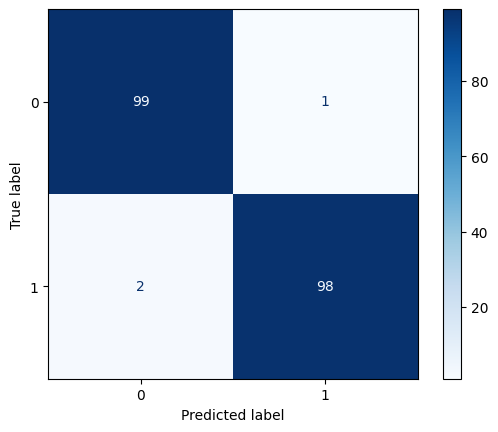

In [150]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make prediction (Convert prediction probabilites to binary predictions)
y_preds = tf.round(model_10.predict(X_test))

# Create and plot confusion matrix
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_preds))
cm.plot(cmap="Blues");

# Working with a larger example (Multiclass classification)

When there are more than two classes of an option, it's known as **multi-class classification**

* This means having 3 different classes is a multiclass-classifcation.
* Also means that having 100 different classes is also a mutliclass=classification.

To practice multiclass classification, build a neural network to classify images of different items of clothin.

In [151]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been splitted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [152]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [153]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

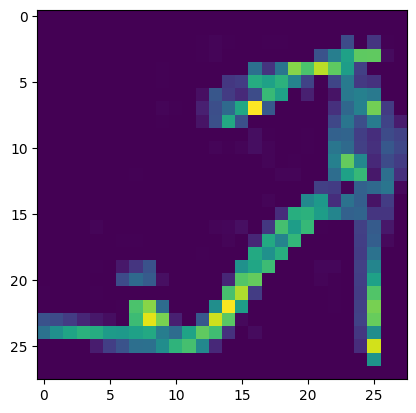

In [158]:
# Show a sample
import matplotlib.pyplot as plt
plt.imshow(train_data[8]);

In [159]:
# Check out samples label
train_labels[8]

5

In [160]:
# Create a small list to index training labels to become human readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

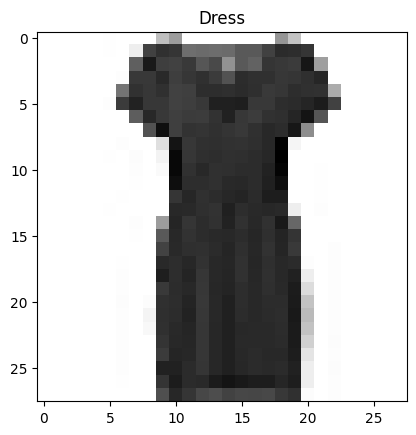

In [161]:
# Plot sample image and label
chosen_index = 20
plt.imshow(train_data[chosen_index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[chosen_index]]);

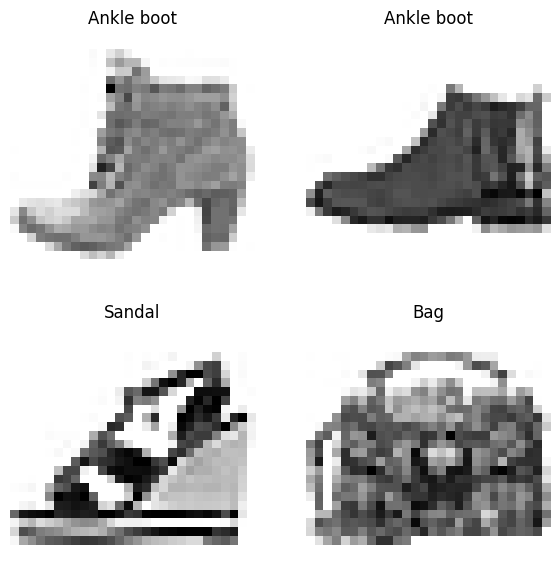

In [170]:
# Plot multiple random images of fashion MNISt
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multiclass classification model

For the multiclass classification model, a similar architecture of binary classification can be followed but a few things need to be tweaked:

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If labels are one-hot encoded use CategoricalCrossEntropy() but if labels are in integer form use SparseCategoricalEntropy()
* Output layer activation = Softmax (not Sigmoid)

In [175]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # data needs to be flattend to a vector
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.2769 - accuracy: 0.1282 - val_loss: 2.2509 - val_accuracy: 0.1238
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.0778 - accuracy: 0.1856 - val_loss: 1.8469 - val_accuracy: 0.2560
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7598 - accuracy: 0.2418 - val_loss: 1.6961 - val_accuracy: 0.2499
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6793 - accuracy: 0.2634 - val_loss: 1.6480 - val_accuracy: 0.2677
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6372 - accuracy: 0.3144 - val_loss: 1.6049 - val_accuracy: 0.3555
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5320 - accuracy: 0.3729 - val_loss: 1.3764 - val_accuracy: 0.4363
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3376 - accuracy: 0.4424 - val_loss: 1.3620 - val_accu

In [176]:
# Check model summary
model_11.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_82 (Dense)            (None, 4)                 3140      
                                                                 
 dense_83 (Dense)            (None, 4)                 20        
                                                                 
 dense_84 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [177]:
# Check the min and max values of the training dataf
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means that they prefer to have the numbers in the tensors to be between 0 & 1 to find patterns.

In [178]:
# Get training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [180]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_12.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0859 - accuracy: 0.5719 - val_loss: 0.8315 - val_accuracy: 0.6973
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7586 - accuracy: 0.7276 - val_loss: 0.7497 - val_accuracy: 0.7365
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6978 - accuracy: 0.7510 - val_loss: 0.7103 - val_accuracy: 0.7547
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6654 - accuracy: 0.7625 - val_loss: 0.6809 - val_accuracy: 0.7642
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6438 - accuracy: 0.7696 - val_loss: 0.6595 - val_accuracy: 0.7699
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6277 - accuracy: 0.7766 - val_loss: 0.6547 - val_accuracy: 0.7727
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6177 - accuracy: 0.7797 - val_loss: 0.6497 - val_accuracy:

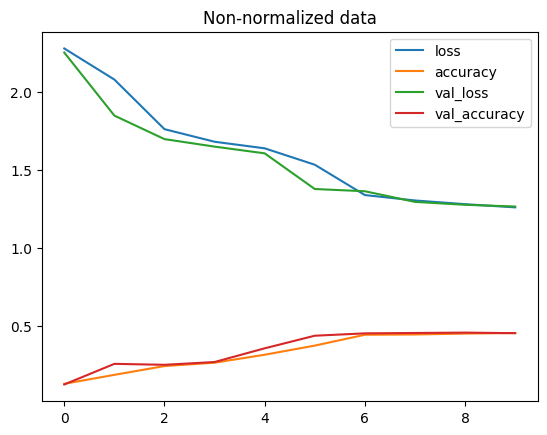

In [194]:
import polars as pl
# Plot non-normalized data loss curves
plt.plot(pl.DataFrame(non_norm_history.history))
plt.legend(pl.DataFrame(non_norm_history.history).columns)
plt.title("Non-normalized data");

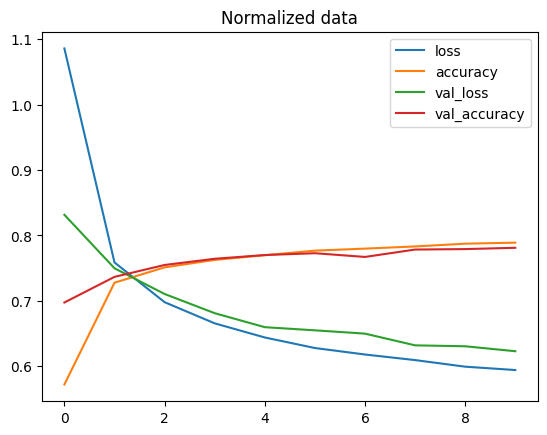

In [193]:
# Plot normalized data loss curves
plt.plot(pl.DataFrame(norm_history.history))
plt.legend(pl.DataFrame(norm_history.history).columns)
plt.title("Normalized data");

The same model with even *slightly* different data can produce *dramatically* different results. So when comparing models, it's important to make sure they are being compared on the same criteria (e.g. same architecture but different data or same data but different architecture)

## Find the ideal learning rate

In [196]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_13.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 3. Fit the model
find_lr_history = model_13.fit(train_data_norm,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3271 - accuracy: 0.5338 - val_loss: 1.0333 - val_accuracy: 0.6254 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9095 - accuracy: 0.6649 - val_loss: 0.8786 - val_accuracy: 0.6817 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7817 - accuracy: 0.7011 - val_loss: 0.7923 - val_accuracy: 0.6876 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7280 - accuracy: 0.7197 - val_loss: 0.7402 - val_accuracy: 0.7300 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6905 - accuracy: 0.7539 - val_loss: 0.7202 - val_accuracy: 0.7595 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6431 - accuracy: 0.7799 - val_loss: 0.6805 - val_accuracy: 0.7728 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 9s

Text(0.5, 1.0, 'Finding the ideal learning rate')

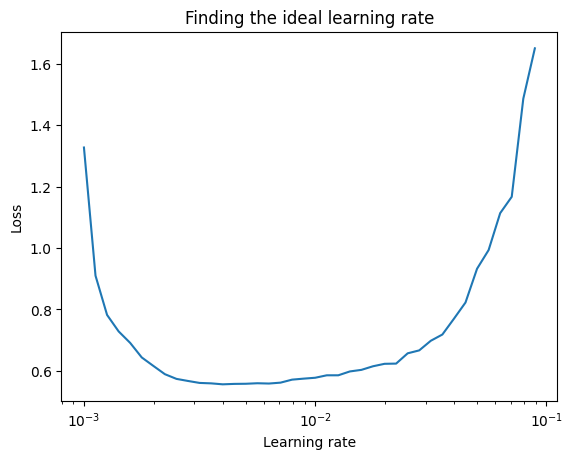

In [197]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [198]:
# Refit model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_14.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# 3. Fit the model
history_14 = model_14.fit(train_data_norm,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1900 - accuracy: 0.5562 - val_loss: 0.8250 - val_accuracy: 0.7128
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7422 - accuracy: 0.7335 - val_loss: 0.7141 - val_accuracy: 0.7381
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6566 - accuracy: 0.7621 - val_loss: 0.6527 - val_accuracy: 0.7721
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6147 - accuracy: 0.7806 - val_loss: 0.6194 - val_accuracy: 0.7846
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5852 - accuracy: 0.7915 - val_loss: 0.6010 - val_accuracy: 0.7907
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5657 - accuracy: 0.8006 - val_loss: 0.5983 - val_accuracy: 0.7943
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5537 - accuracy: 0.8059 - val_loss: 0.5895 - val_accuracy

## Evaluating multiclass classification model

* Evaluate its performance using other classification metrics
* Assess some of its predictions (through visualizations)
* Improve its results (by trainin it for longer or changing the architecture)

313/313 [==============================] - 1s 2ms/step


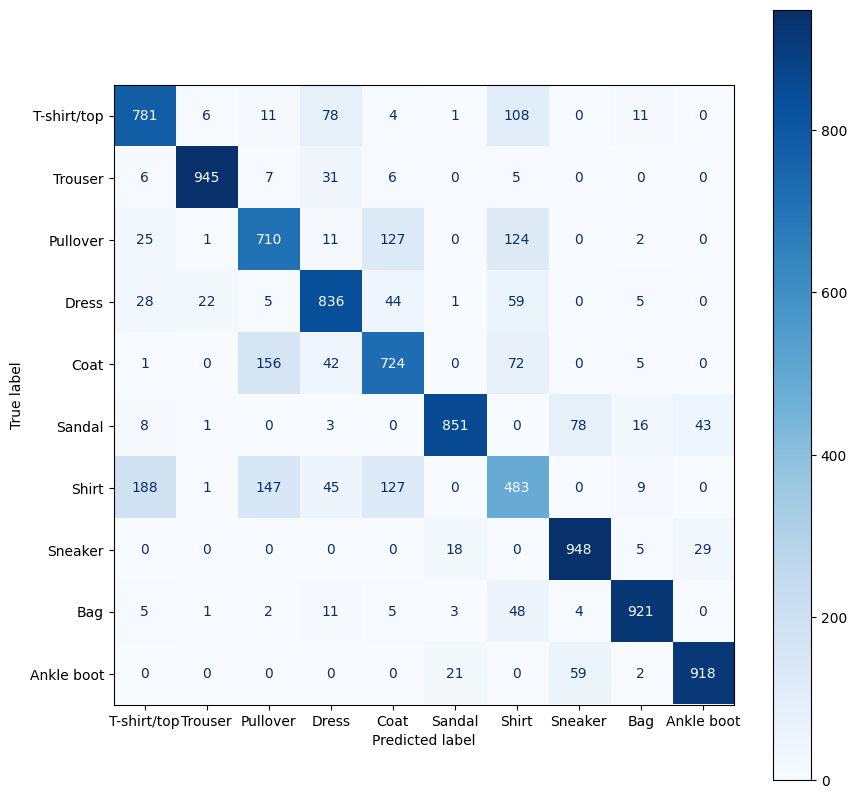

In [221]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make prediction (Convert prediction probabilites to interger predictions)
predictions = model_14.predict(test_data_norm).argmax(axis=1)

# Create and plot confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(test_labels, predictions, 
                            display_labels=class_names,
                            cmap="Blues")
cm.figure_.set_figwidth(10)
cm.figure_.set_figheight(10)

Create a function for:
* Plotting a random image
* Making a prediction on said image
* Label the plot with the truth label and the predicted label

In [224]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediciton and truth label.
    """

    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% True: {}".format(pred_label, 
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
                                                     color=color) # set the color to green or red depending on prediction        


1/1 [==============================] - 0s 19ms/step


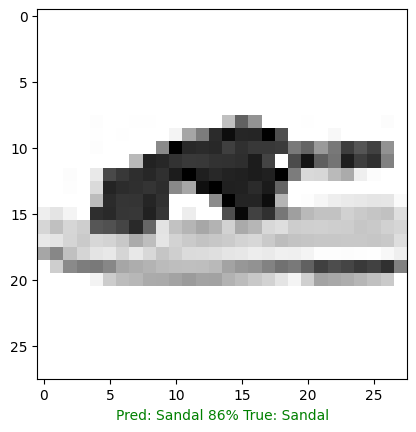

In [263]:
# Check out a random image as well as its prediction
plot_random_image(model_14, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

## What patterns is the model learning?

In [264]:
# Find the layers of the most recent model
model_14.layers

In [265]:
# Extract a particular layer
model_14.layers[1]

In [266]:
# Get the patterns of a layer in the network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.32574108, -0.52905655,  0.47696206, -0.7277612 ],
        [-0.9801341 ,  0.40365034,  0.1635697 , -0.5826337 ],
        [-1.3168052 , -0.6418442 ,  0.26430422, -0.7482775 ],
        ...,
        [ 0.00931828, -0.04108838,  0.8136143 ,  0.162067  ],
        [-0.36045417,  0.09169502,  0.28926095,  0.03895694],
        [-0.26764116, -0.0181279 ,  0.2838974 , -0.25052524]],
       dtype=float32),
 (784, 4))

In [267]:
model_14.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_97 (Dense)            (None, 4)                 3140      
                                                                 
 dense_98 (Dense)            (None, 4)                 20        
                                                                 
 dense_99 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [268]:
biases, biases.shape

(array([0.50455666, 0.6935832 , 2.8260055 , 0.80516577], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeroes.

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

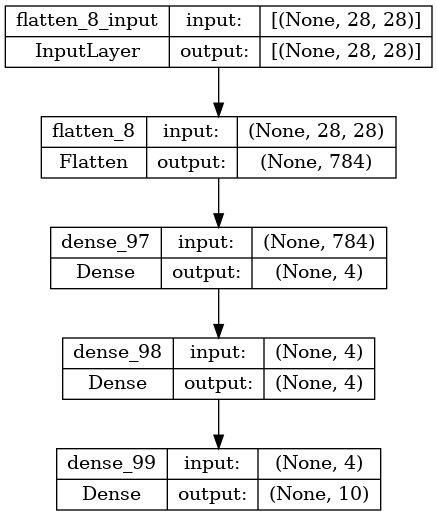

In [270]:
# Check out another way of viewing deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True, to_file="models/model_14_layers.png")